## PROJECT :- SMS SPAM DETECTOR By Using ML

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("spam.csv",encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## All topic in this project.
### 1.Data cleaning
### 2.EDA
### 3.Text prprocessing
### 4.ModelBuilding
### 5.Evaluation
### 6.Improvment
### 7.Wibsite
### 8.Deploy

## START THE PROJECT 

### # 1.Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
## Drop last 3 columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
## Renaming the columns

df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
## Apply label encoder

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [18]:
encoder = LabelEncoder()

In [19]:
df['target'] = encoder.fit_transform(df['target'])

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
## Check missing value.

df.isnull().sum()

target    0
text      0
dtype: int64

In [22]:
## Check duplicated value

df.duplicated().sum()

0

In [23]:
## Remove Duplicated value 

df = df.drop_duplicates(keep='first')

In [24]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df.duplicated().sum()

0

In [26]:
df.shape

(5169, 2)

## 2. Next Steps EDA.

In [27]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

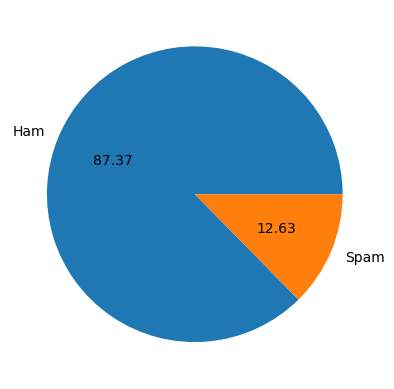

In [28]:
plt.pie(df['target'].value_counts(),labels=['Ham','Spam'],
        autopct='%0.2f')
plt.show()

### Data is inbalance . Don't forget it.

In [29]:
#!pip install nltk

In [30]:
import nltk

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dheer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
## Check length pr sms
## Store new columns

df['num_characters']=df['text'].apply(len)

In [33]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dheer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
## Break sentense in num of words.
from nltk.tokenize import word_tokenize

#df['tokenized'] = df['text'].apply(lambda x: nltk.word_tokenize(x))
df['text'].astype(str).apply(lambda x: x.split())


0       [Go, until, jurong, point,, crazy.., Available...
1                    [Ok, lar..., Joking, wif, u, oni...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor..., U, c, already...
4       [Nah, I, don't, think, he, goes, to, usf,, he,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568       [Will, Ì_, b, going, to, esplanade, fr, home?]
5569    [Pity,, *, was, in, mood, for, that., So...any...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                    [Rofl., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [36]:
df['num_word'] = df['text'].astype(str).apply(lambda x:len( x.split()))


In [37]:
df['num_word']

0       20
1        6
2       28
3       11
4       13
        ..
5567    30
5568     8
5569    10
5570    26
5571     6
Name: num_word, Length: 5169, dtype: int64

In [38]:
#!pip install --upgrade nltk


In [39]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dheer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dheer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [41]:
from nltk.tokenize import sent_tokenize

# Apply sent_tokenize to each row (each string)
df['num_sentences'] = df['text'].apply(lambda x: sent_tokenize(x))


In [42]:
df['num_sentences']

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: num_sentences, Length: 5169, dtype: object

In [43]:
df['num_sentences'] = df['text'].apply(lambda x: len(sent_tokenize(x)))

In [44]:
df['num_sentences']

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: num_sentences, Length: 5169, dtype: int64

In [45]:
df.head()

,target,text,num_characters,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [46]:
df[['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,1.965564
std,58.236293,11.068488,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,1.000000
75%,117.000000,22.000000,2.000000
max,910.000000,171.000000,38.000000


In [47]:
## Ham massege.

df[df['target']== 0][['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.820195
std,56.358207,11.116240,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,38.000000


In [48]:
## Spam massege.

df[df['target']== 1][['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.970904
std,30.137753,5.967672,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


## Plot Histogram for Spam and Ham.

<Axes: xlabel='num_characters', ylabel='Count'>

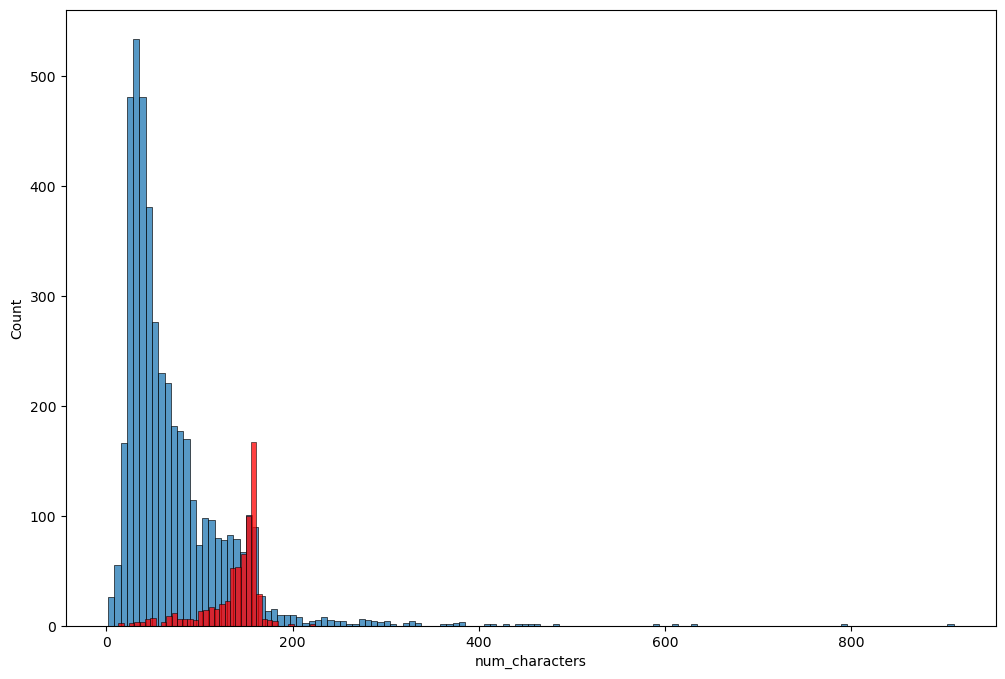

In [49]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_word', ylabel='Count'>

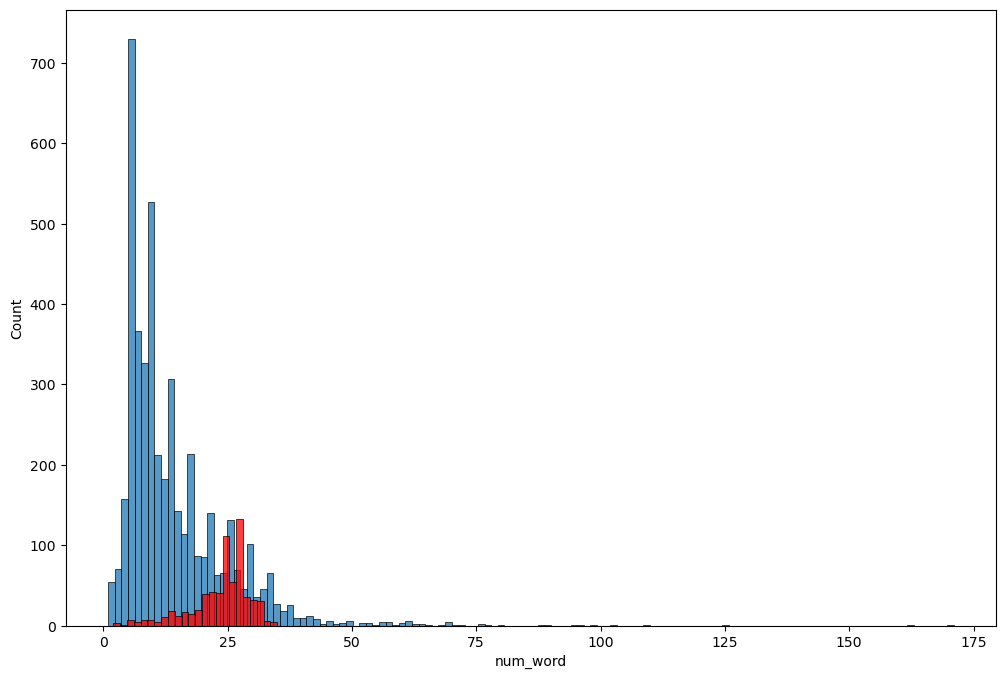

In [50]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_word'])
sns.histplot(df[df['target']==1]['num_word'],color='red')

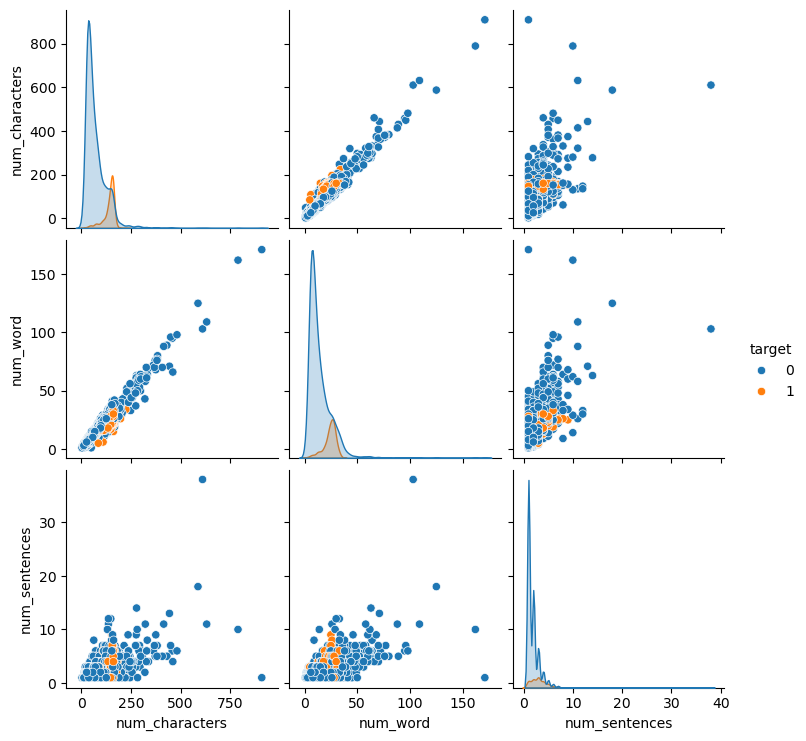

In [51]:
sns.pairplot(df,hue='target')

In [52]:
## Check correlation 

df.corr(numeric_only=True)

,target,num_characters,num_word,num_sentences
target,1.000000,0.384717,0.286576,0.263939
num_characters,0.384717,1.000000,0.973667,0.624139
num_word,0.286576,0.973667,1.000000,0.626274
num_sentences,0.263939,0.624139,0.626274,1.000000


<Axes: >

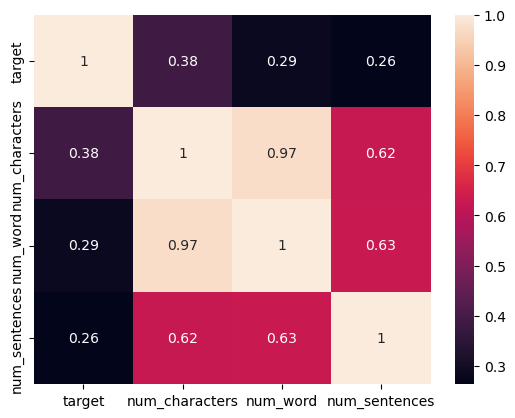

In [53]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## 3. Data preproceesing
. Lower case
. Tokenization
. Removinng special characters
. Removing stop words and puntuation
. Stemming.

In [57]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

#nltk.download('punkt')  # make sure punkt is downloaded
#nltk.download('stopwords')  # make sure stopwords is downloaded


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [58]:
transform_text('Did you like my presentation on ml How much loved Ml')

'like present ml much love ml'

In [59]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [60]:
df['transform_text']=df['text'].apply(transform_text)

In [61]:
df.head(3)

,target,text,num_characters,num_word,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...


In [62]:
from wordcloud import WordCloud

wc = WordCloud(width = 500,height=500,
              min_font_size=10,background_color='white')

In [63]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

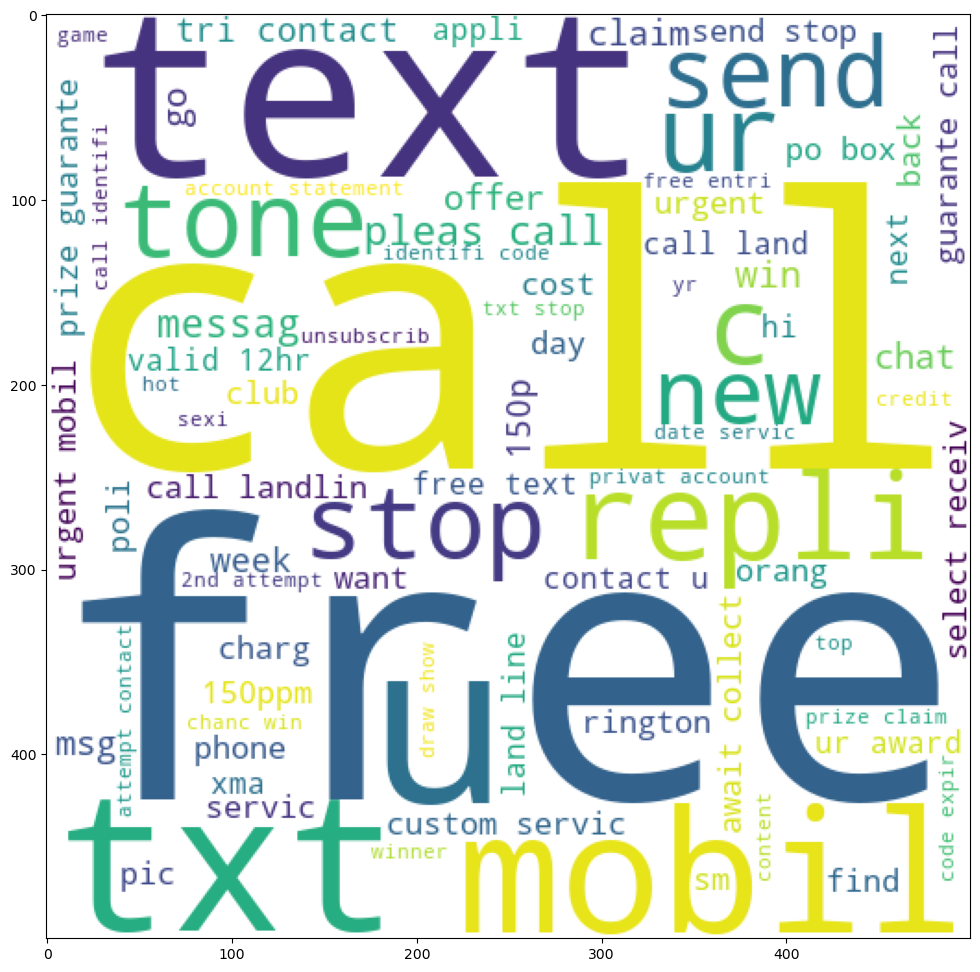

In [64]:
plt.figure(figsize=(16,12))

plt.imshow(spam_wc)

In [65]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

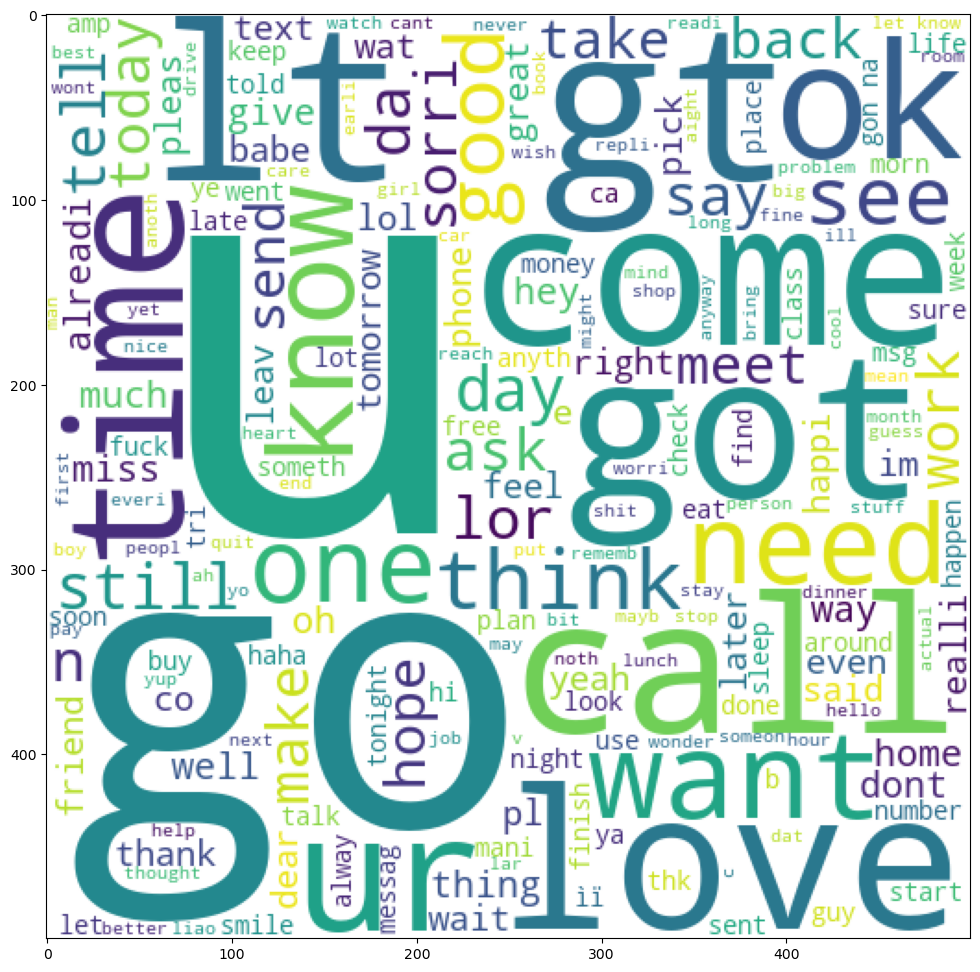

In [66]:
plt.figure(figsize=(16,12))

plt.imshow(ham_wc)

In [67]:
## Chech top 30 word spam and ham which  is used.
spam_corpus =[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    


In [68]:
len(spam_corpus)

9939

In [69]:
from collections import Counter

pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


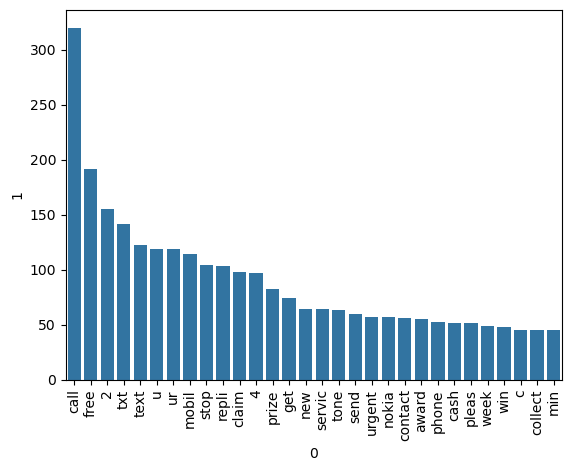

In [70]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

plt.xticks(rotation ='vertical')
plt.show()


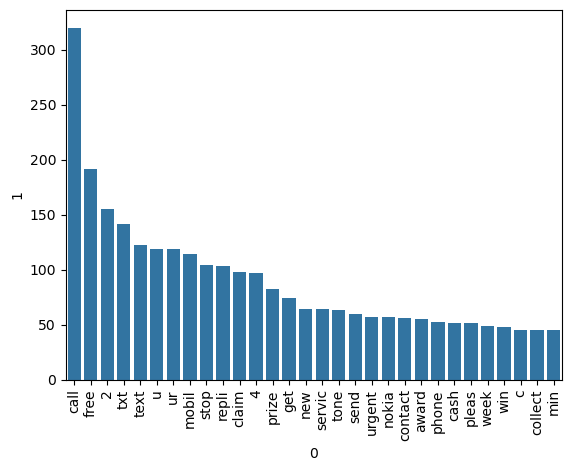

In [71]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

plt.xticks(rotation ='vertical')
plt.show()


In [72]:
## Chech top 30 word spam and ham which  is used.
ham_corpus =[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
    


In [73]:
len(ham_corpus)

35404

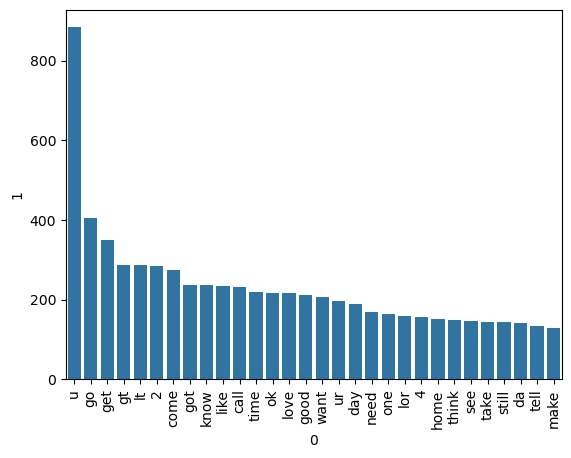

In [74]:
from collections import Counter

pd.DataFrame(Counter(ham_corpus).most_common(30))

sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

plt.xticks(rotation ='vertical')
plt.show()


## 4. Model Building

In [75]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [76]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)


In [77]:
#x = cv.fit_transform(df['transform_text']).toarray()

In [78]:
x = tfidf.fit_transform(df['transform_text']).toarray()

In [79]:
x.shape

(5169, 3000)

In [80]:
y = df['target'].values

In [81]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,
                                               random_state=2)

In [84]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [85]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [86]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [87]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)


In [88]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [89]:
mnb.fit(x_train,y_train)
y_pred2 =mnb.predict(x_test)

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [90]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [91]:
## Choose Tfid and mnb.

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [93]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [94]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [95]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [96]:
train_classifier(svc,x_train,y_train,x_test,y_test)


(0.9758220502901354, 0.9747899159663865)

In [97]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8488372093023255
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655


In [98]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [99]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


In [100]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [101]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.924565


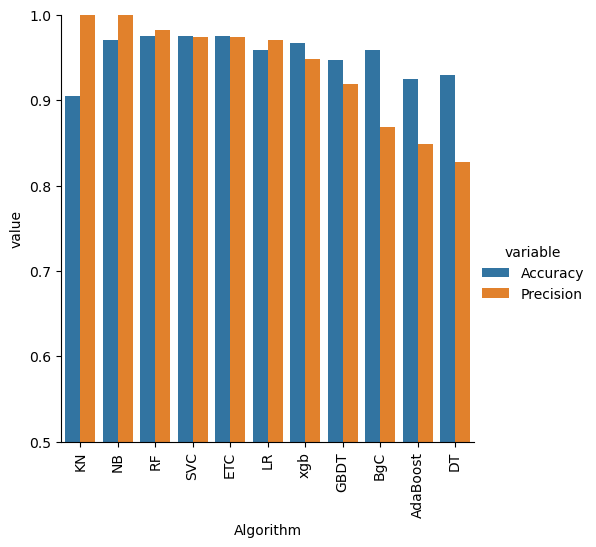

In [102]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [103]:
## model improve
## 1. Change the max_features parameter of TfIdf

In [104]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [105]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [106]:

new_df = performance_df.merge(temp_df,on='Algorithm')


In [108]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [109]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276
7,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,AdaBoost,0.924565,0.848837,0.924565,0.848837,0.924565,0.848837


In [372]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [110]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_scaling,Precision_scaling
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276
7,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,AdaBoost,0.924565,0.848837,0.924565,0.848837,0.924565,0.848837,0.924565,0.848837


In [131]:
# Voting Classifier
#svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
#etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

#from sklearn.ensemble import VotingClassifier



In [132]:
#voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [139]:
model = mnb.fit(x_train,y_train)
model

MultinomialNB()

In [140]:
y_pred = model.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9709864603481625
Precision 1.0


In [141]:
# Applying stacking
#estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [142]:
from sklearn.ensemble import StackingClassifier

In [143]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [144]:
clf.fit_transform(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [146]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))